In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def compute_cost(x,y,w,b,lambda_):
    m,n=x.shape #m is examples,n is features
    Y=np.dot(w,x.T)+b
    a=(Y-y)**2/(2*m)
    c=a.sum()+lambda_*(np.abs(w).sum())/(2*m)
    return c
    

In [3]:
def cost_der(x,y,w,b,lambda_):
    m,n=x.shape
    dw=np.dot((np.dot(w,x.T)+b-y),x)/(m)+lambda_*np.sign(w)/m
    db=(np.dot(w,x.T)+b-y)/m
    return dw,db.sum()

In [4]:
def norm(p):
    a=np.zeros(len(p))
    a=(p-p.mean())/(np.std(p)+1e-15)
    return a

def normalize(x):
    m,n=x.shape
    p=np.zeros(n)
    x1=np.zeros((m,n))
    for i in range(n):
        p=x[:,i]
        a=norm(p)
        x1[:,i]=a
    return x1

In [5]:
def grad_desc(x,y,alpha,iter,lambda_=100):
    m,n=x.shape #m is examples,n is features
    w_in=np.zeros(n)
    b_in=0
    cost=[]
    for i in range(iter):
        dw,db=cost_der(x,y,w_in,b_in,lambda_)
        w_in-=alpha*dw
        b_in-=alpha*db
        c=compute_cost(x,y,w_in,b_in,lambda_)
        cost.append(c)
        if i%(iter//10)==0:
            print('iter:',i,'cost:',c)
    return w_in,b_in,cost

In [6]:
def calculate_r2_score(actual_values, predicted_values):
    
    mean_actual = np.mean(actual_values)   
    ss_t = np.sum((actual_values-mean_actual)**2)   
    ss_r = np.sum((actual_values-predicted_values)**2)
    r2_score = 1 -(ss_r/ss_t)
    return r2_score
def pred(x,w,b):
    p=np.dot(w,x.T)+b
    return p

In [7]:
def train_test_split(x,y,test_size):
    m,n=x.shape
    indices=np.arange(m)
    p=np.random.permutation(indices)
    x_test=x[p][:int(m*test_size)]
    y_test=y[p][:int(m*test_size)]
    x_train=x[p][int(m*test_size):]
    y_train=y[p][int(m*test_size):]
    return x_train,y_train,x_test,y_test

In [8]:
df=pd.read_csv('Lineardata_train.csv')

In [9]:
df

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-7567.227845,2.029910,-0.928164,-2.463563,5.312071,2.070290,0.835355,-4.421930,18.292309,-10.357047,...,-2.827488,17.940836,25.724137,-29.713820,0.625372,-183.410260,19.439815,6.640099,-41.093484,-1.010290
49996,-9973.851789,-0.223475,0.341542,-4.423256,-0.104668,4.384320,-2.290826,4.612476,29.667901,-9.675776,...,-17.744738,-0.708422,15.907878,10.865072,-31.280568,-354.186800,6.363459,0.370644,35.952861,3.752642
49997,-8246.697221,-0.321085,1.608386,-11.177100,-1.140550,-10.832891,-8.625981,-27.740091,-14.166217,9.169728,...,3.841781,-17.941987,-2.167623,11.336067,-2.542123,-98.327808,-13.690353,-4.299753,16.053032,14.812715
49998,-9101.101377,-2.383432,1.214911,0.925113,0.017874,2.022561,1.209647,5.006908,-12.043059,-5.756141,...,5.308136,12.387029,20.220357,-1.359887,83.958829,-314.127483,-2.550699,-5.082801,7.514089,30.150485


In [10]:
y=df['target']
x=df.drop(['target'],axis=1)

In [11]:
x_train=x.to_numpy()
y_train=y.to_numpy()
x_train1,y_train1,x_train_cv,y_train_cv=train_test_split(normalize(x_train),y_train,0.2)


In [12]:
w,b,cost=grad_desc(x_train1,y_train1,6e-2,1000,0)    #3.6e-5


iter: 0 cost: 57791850.7029407
iter: 100 cost: 249.22179567325986
iter: 200 cost: 0.006166158731832719
iter: 300 cost: 0.005030559447809279
iter: 400 cost: 0.005030553999726256
iter: 500 cost: 0.005030553999698068
iter: 600 cost: 0.005030553999698978
iter: 700 cost: 0.005030553999698663
iter: 800 cost: 0.005030553999698841
iter: 900 cost: 0.005030553999698663


Text(0, 0.5, 'cost (in 10^7)')

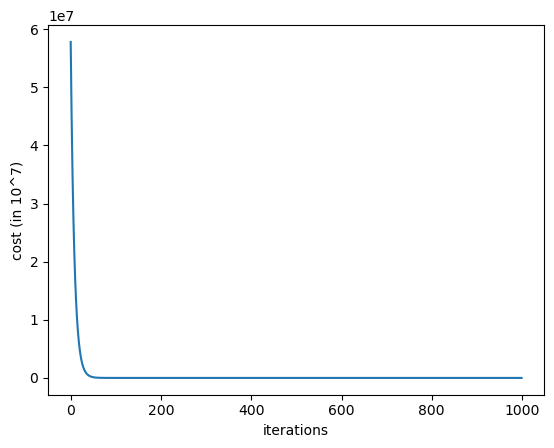

In [14]:
plt.plot(np.arange(1000),cost)
plt.xlabel('iterations')
plt.ylabel('cost (in 10^7)')

In [15]:
predi=pred(x_train1,w,b)
calculate_r2_score(y_train1,predi)

0.9999999999230896

In [16]:
compute_cost(x_train_cv,y_train_cv,w,b,0)

0.005135523847298542

In [17]:
predi=pred(x_train_cv,w,b)
calculate_r2_score(y_train_cv,predi)

0.9999999999221756

In [17]:
#testcsv=pd.read_csv('Lineardata_test.csv')
#id=testcsv['ID']
#x_test=testcsv.drop(['ID'],axis=1)
#x_test=x_test.to_numpy()

In [18]:
#predi2=pred(x_test,w,b)

In [19]:
#output=pd.DataFrame({'id':id,'output':predi2})

In [20]:
#output.to_csv('LinearData_output.csv')